- Leeza Sergeeva - questions 1 through 4
- Thomas Boisvert - questions 5 through 7
- Final Assignment
- 3/10/2022

# Leeza Sergeeva

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.stats

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

from sklearn.model_selection import train_test_split
from sklearn import metrics

Dataset was obtained from https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

In [2]:
filename = "data/melb_data.csv"
df = pd.read_csv(filename)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


1. Do the following to explore the data.

a) Print the number of missing values for each variable. Are there any variables that you think might have issues from this?

In [4]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

BuildingArea, YearBuilt and CouncilArea have a lot of missing values, this can potentially affect the model for predicting the price of the real estate. Since I want to use 'Car' value for further studies, I'll create a new df with dropped N/A values from Car column.

In [5]:
df = df.dropna(subset=['Car'])

In [6]:
df = df.dropna()

(b) Create a bar chart that shows the median housing price for each Regionname Do you think that Regionname will affect housing price?

<AxesSubplot:ylabel='Regionname'>

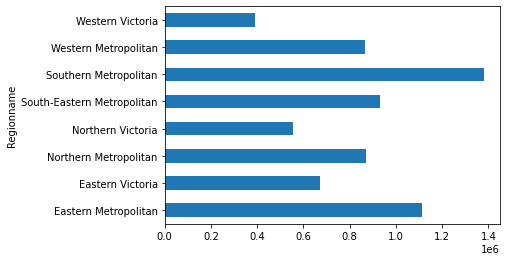

In [7]:
# set up new grouped by data to show average prices per region
region_mean_df = df.groupby("Regionname")["Price"].mean()

# create bar graph representing data
region_mean_df.plot.barh(x='Price', y='Regionname', rot=0)

It looks like the area region affects the prices of real estate. Metrapolitan areas are more expansive. Southern metropolitan are has the most expansive real estate on average, while western victoria has the cheapest average price.

(c) Use seaborn’s lmplot function to create a scatter plot with Lattitude on the x-axis and Longtitude on the y-axis colored by Distance (Hint: set legend andfit reg to False). What is this?

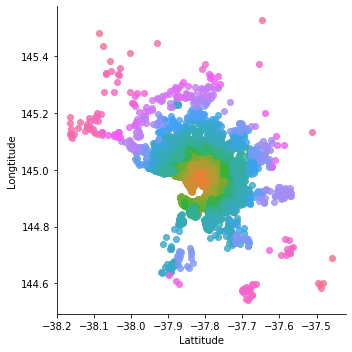

In [8]:
sns.lmplot(x='Lattitude', y='Longtitude', data=df, hue='Distance', legend=False, fit_reg=False)

This plot shows the locations of all real astate listings in Melbourn with color representing the distance from central business district.

2. Assume that the mean of Price in this dataset is the population mean for housing prices in Melbourne. Choose a particular Region, take a random sample of 25 houses from Regionname and conduct a z-test with level of significance α = 0:5 to decide if housing prices in this Region differ from the population mean significantly. Use the standard error of the sample as the variance for the distribution of sample means.

(a) What are the Null and Alternative Hypothesis?

In [9]:
population_mean = df['Price'].mean()
population_mean

1068828.202065849

In [10]:
# sample 25 houses from Southern Metropolitan
sample_sm_df = df[df['Regionname'] == 'Southern Metropolitan'].sample(25)

sample_mean = sample_sm_df['Price'].mean()
sample_mean

1225920.0

In [11]:
std_error = scipy.stats.sem(sample_sm_df['Price'], nan_policy='omit')
std_error

107225.76913534668

In [12]:
z = (sample_mean - population_mean) / (std_error)
z

1.4650563871065407

Null Hypothesis: housing prices in the Southern Metropolitan Region are same as the population mean.
Alternative Hypothesis: housing prices in the Southern Metropolitan Region differ from the population mean significantly.

(b) Use the p-value to decide whether to reject or fail to reject.

In [13]:
def p_left_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)

p = 2*p_left_of_z(-z)
p

0.1429055342565444

In [14]:
p<0.05

False

Our significance level is 𝛼=0.05. Because 𝑝<𝛼  we reject the null hypothesis. Therefore housing prices in the Southern Metropolitan Region differ from the population mean significantly.

3. Find two variables that are linearly correlated and provide the three pieces of evidence below:

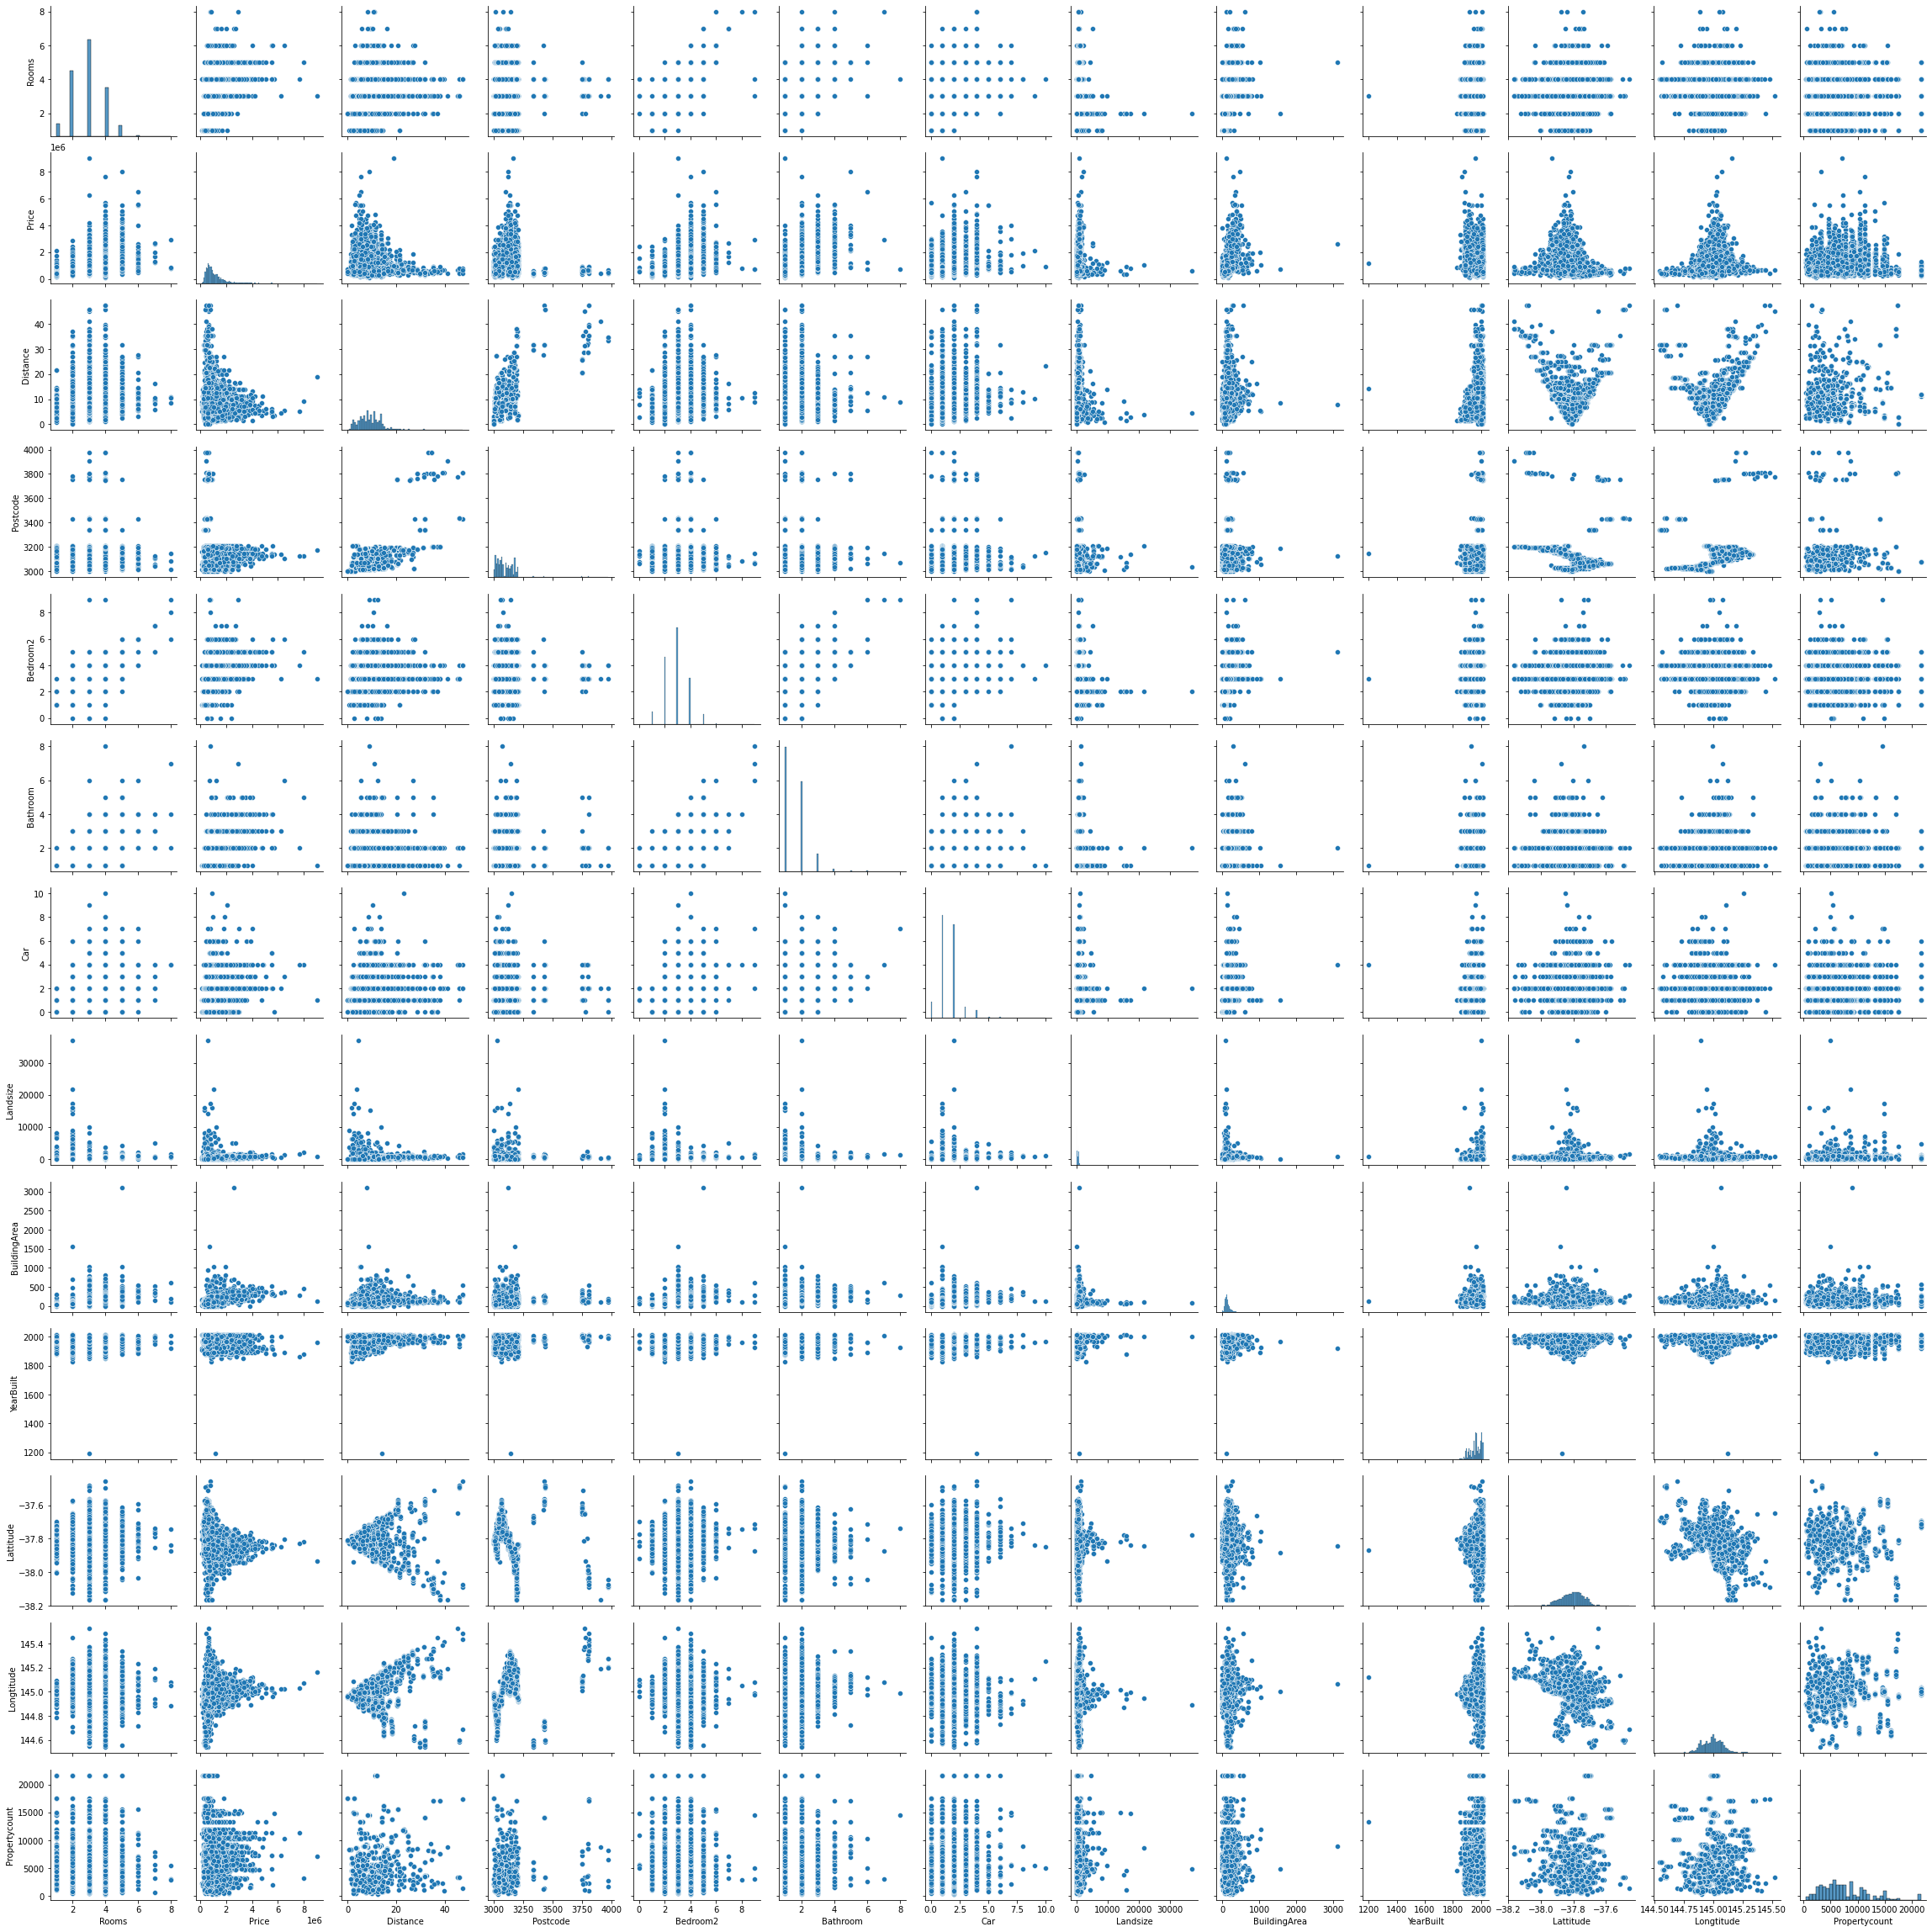

In [15]:
sns.pairplot(df)

(a) Scatter plot of the two variables

Text(0, 0.5, '# of Rooms')

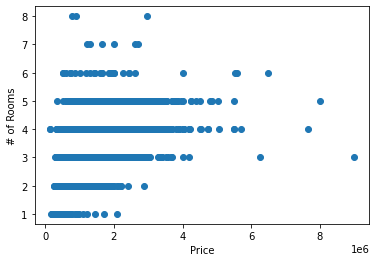

In [16]:
plt.scatter(x=df['Price'], y=df['Rooms'])
plt.xlabel("Price")
plt.ylabel('# of Rooms')

(b) Pearson Correlation Coefficient between the two variables

In [17]:
# make small df containing only two columns
data = [df["Price"], df["Rooms"]]
headers = ["Price", "Rooms"]
# outputs the pearson correlation ceofficient between each pair of variables
corr_df = pd.concat(data, axis=1, keys=headers)
corr_df.corr()

,Price,Rooms
Price,1.000000,0.533505
Rooms,0.533505,1.000000


Pearson Correlation Coefficient between the number of rooms and the price of the real estate is 0.496634. This means that these two variables have strong positive correlation.

(c) Scatter plot of the fitted values of the line of best fit against the residuals

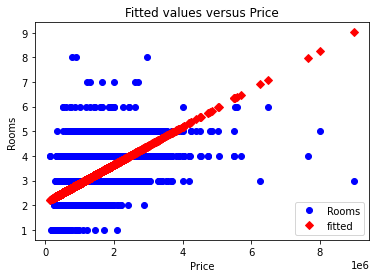

In [18]:
Y = df['Rooms']
X = df['Price']

X = sm.add_constant(X)

model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

model_result.fittedvalues

sm.graphics.plot_fit(model_result,1, vlines=False);


4. (a) Pick three variables that might be linearly correlated with Price (anything with Correlation Coefficient ρ satisfying |ρ| > 0.1) that satisfy a *weak* assumption of non-Multicolinearity (use a Correlation Coefficient ρ satisfying |ρ| > 0.75 to determine strongly colinear)

In [19]:
df.corr() # Price ~ Rooms + Distance + Car


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533505,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,-0.068122,0.016049,0.088031,-0.111422
Price,0.533505,1.000000,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,-0.304633,-0.213574,0.211760,-0.046410
Distance,0.283885,-0.148867,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,0.246291,-0.094494,0.221861,-0.083969
Postcode,0.051237,0.125539,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,0.024375,-0.425172,0.471305,0.064534
Bedroom2,0.951793,0.514561,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,-0.056343,0.021309,0.085895,-0.109401
Bathroom,0.613853,0.503922,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,0.157820,-0.072020,0.116103,-0.067126
Car,0.422526,0.261507,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,0.108714,0.011973,0.054699,-0.046487
Landsize,0.098755,0.081419,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,0.026518,0.005610,0.032918,-0.017784
BuildingArea,0.608215,0.530574,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,0.005836,-0.037904,0.103613,-0.066144
YearBuilt,-0.068122,-0.304633,0.246291,0.024375,-0.056343,0.157820,0.108714,0.026518,0.005836,1.000000,0.057108,-0.002114,-0.000797


Based on Correlation Coefficient Matrix values for 'Price', I've picked variables 'Rooms', 'Bathroom', and 'Car'.

(b) Perform OLS regression and report the R2.

In [20]:
model = ols(formula = 'Price ~ Rooms + Distance + Car', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1331.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:06:18   Log-Likelihood:                -90416.
No. Observations:                6196   AIC:                         1.808e+05
Df Residuals:                    6192   BIC:                         1.809e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.56e+05   2.22e+04      7.014      0.000    1.12e+05       2e+05
Rooms       4.071e+05   7746.514     52.556      0.000    3.92e+05    4.22e+05
Distance   -4.148e+04   1263.083    -32.838      0.000    -4.4e+04    -3.9e+04
Car         7.872e+04   8064.076      9.761      0.000    6.29e+04    9.45e+04
==============================================================================
Omnibus:                     4016.391   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123891.698
Skew:                           2.627   Prob(JB):                         0.00
Kurtosis:                      24.267   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
print("R-squared: ", res.rsquared)

R-squared:  0.39208141556319764


# Thomas Boisvert

In [22]:
# Load housing dataset
df_housing = pd.read_csv('data/melb_data.csv')
df_housing = df_housing.dropna()

5. (a) Create a validation set using ten percent of the data.

In [23]:
# take random 10% of the housing for testing
train, val = train_test_split(df_housing, test_size=0.1, random_state=2020)
train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3446,Keilor East,27 Judith St,3,h,772000.0,S,Nelson,7/05/2016,12.8,3033.0,...,2.0,3.0,672.0,132.0,1980.0,Moonee Valley,-37.74650,144.87600,Western Metropolitan,5629.0
1882,Clifton Hill,13 Caroline St,3,h,1060000.0,S,Nelson,7/11/2016,3.4,3068.0,...,1.0,0.0,193.0,98.0,1900.0,Yarra,-37.78990,144.99840,Northern Metropolitan,2954.0
3998,Melbourne,32/2 Exhibition St,1,u,700000.0,VB,Castran,19/11/2016,2.8,3000.0,...,1.0,1.0,0.0,64.0,1920.0,Melbourne,-37.81570,144.97270,Northern Metropolitan,17496.0
11579,Aspendale,14 Ebb St,3,h,970000.0,VB,hockingstuart,22/07/2017,21.5,3195.0,...,2.0,2.0,612.0,154.0,1960.0,Kingston,-38.01596,145.09932,South-Eastern Metropolitan,2824.0
9400,Altona North,242 Mason St,3,h,870000.0,S,hockingstuart,17/06/2017,9.4,3025.0,...,1.0,4.0,559.0,560.0,1950.0,Hobsons Bay,-37.83990,144.86228,Western Metropolitan,5132.0


In [24]:
val.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2559,Fitzroy North,2 Pilkington St,4,h,1450000.0,VB,Nelson,3/09/2016,3.5,3068.0,...,2.0,1.0,266.0,175.0,1950.0,Yarra,-37.7797,144.9861,Northern Metropolitan,6244.0
6833,Carlton,403/20 Reeves St,2,u,500000.0,S,Harrington,14/05/2016,1.8,3053.0,...,2.0,1.0,0.0,65.0,2010.0,Melbourne,-37.7929,144.9705,Northern Metropolitan,6786.0
1020,Braybrook,21 Hughes St,3,h,575000.0,S,Trimson,10/12/2016,10.8,3019.0,...,1.0,3.0,559.0,98.0,1955.0,Maribyrnong,-37.7923,144.8520,Western Metropolitan,3589.0
1624,Camberwell,1/28 Nevis St,2,u,700000.0,S,Marshall,27/11/2016,7.8,3124.0,...,1.0,1.0,631.0,75.0,1970.0,Boroondara,-37.8434,145.0810,Southern Metropolitan,8920.0
195,Altona North,5 Binns St,3,h,710000.0,PI,Village,7/11/2016,11.1,3025.0,...,1.0,3.0,540.0,116.0,1960.0,Hobsons Bay,-37.8294,144.8378,Western Metropolitan,5132.0


(b) Engineer one new feature.

In [25]:
df_housing['price_per_room'] = df_housing['Price'] / df_housing['Rooms']
df_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_per_room
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,517500.000000
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,488333.333333
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,400000.000000
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,625333.333333
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0,818000.000000


In [26]:
train, val = train_test_split(df_housing, test_size=0.1, random_state=2020)

In [27]:
train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_per_room
3446,Keilor East,27 Judith St,3,h,772000.0,S,Nelson,7/05/2016,12.8,3033.0,...,3.0,672.0,132.0,1980.0,Moonee Valley,-37.74650,144.87600,Western Metropolitan,5629.0,257333.333333
1882,Clifton Hill,13 Caroline St,3,h,1060000.0,S,Nelson,7/11/2016,3.4,3068.0,...,0.0,193.0,98.0,1900.0,Yarra,-37.78990,144.99840,Northern Metropolitan,2954.0,353333.333333
3998,Melbourne,32/2 Exhibition St,1,u,700000.0,VB,Castran,19/11/2016,2.8,3000.0,...,1.0,0.0,64.0,1920.0,Melbourne,-37.81570,144.97270,Northern Metropolitan,17496.0,700000.000000
11579,Aspendale,14 Ebb St,3,h,970000.0,VB,hockingstuart,22/07/2017,21.5,3195.0,...,2.0,612.0,154.0,1960.0,Kingston,-38.01596,145.09932,South-Eastern Metropolitan,2824.0,323333.333333
9400,Altona North,242 Mason St,3,h,870000.0,S,hockingstuart,17/06/2017,9.4,3025.0,...,4.0,559.0,560.0,1950.0,Hobsons Bay,-37.83990,144.86228,Western Metropolitan,5132.0,290000.000000


In [28]:
val.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_per_room
2559,Fitzroy North,2 Pilkington St,4,h,1450000.0,VB,Nelson,3/09/2016,3.5,3068.0,...,1.0,266.0,175.0,1950.0,Yarra,-37.7797,144.9861,Northern Metropolitan,6244.0,362500.000000
6833,Carlton,403/20 Reeves St,2,u,500000.0,S,Harrington,14/05/2016,1.8,3053.0,...,1.0,0.0,65.0,2010.0,Melbourne,-37.7929,144.9705,Northern Metropolitan,6786.0,250000.000000
1020,Braybrook,21 Hughes St,3,h,575000.0,S,Trimson,10/12/2016,10.8,3019.0,...,3.0,559.0,98.0,1955.0,Maribyrnong,-37.7923,144.8520,Western Metropolitan,3589.0,191666.666667
1624,Camberwell,1/28 Nevis St,2,u,700000.0,S,Marshall,27/11/2016,7.8,3124.0,...,1.0,631.0,75.0,1970.0,Boroondara,-37.8434,145.0810,Southern Metropolitan,8920.0,350000.000000
195,Altona North,5 Binns St,3,h,710000.0,PI,Village,7/11/2016,11.1,3025.0,...,3.0,540.0,116.0,1960.0,Hobsons Bay,-37.8294,144.8378,Western Metropolitan,5132.0,236666.666667


(c) Use this validation set and the R2 metric to decide if this new feature improves the model.

In [29]:
# Test for 3 variables related to price
model = ols(formula = 'Price ~ Rooms + Car + Landsize', data=val)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     92.15
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           2.87e-49
Time:                        23:06:18   Log-Likelihood:                -9039.8
No. Observations:                 620   AIC:                         1.809e+04
Df Residuals:                     616   BIC:                         1.811e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.579e+04   6.99e+04     -1.085      0.278   -2.13e+05    6.14e+04
Rooms       3.605e+05   2.45e+04     14.704      0.000    3.12e+05    4.09e+05
Car         3.049e+04   2.44e+04      1.248      0.213   -1.75e+04    7.85e+04
Landsize      -1.4206     19.129     -0.074      0.941     -38.987      36.146
==============================================================================
Omnibus:                      213.564   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              781.695
Skew:                           1.588   Prob(JB):                    1.81e-170
Kurtosis:                       7.491   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# Add in the new engineered feature
model = ols(formula = 'Price ~ Rooms + Car + Landsize + price_per_room', data=val)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     3233.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:06:18   Log-Likelihood:                -8196.1
No. Observations:                 620   AIC:                         1.640e+04
Df Residuals:                     615   BIC:                         1.642e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.147e+06   2.13e+04    -53.890      0.000   -1.19e+06    -1.1e+06
Rooms           3.617e+05   6293.190     57.470      0.000    3.49e+05    3.74e+05
Car             4551.6544   6277.795      0.725      0.469   -7776.859    1.69e+04
Landsize           0.5783      4.910      0.118      0.906      -9.064      10.220
price_per_room     3.1650      0.034     93.465      0.000       3.098       3.231
==============================================================================
Omnibus:                       77.269   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.099
Skew:                          -0.163   Prob(JB):                    3.67e-135
Kurtosis:                       7.885   Cond. No.                     1.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R2 value increases dramatically with this new feature so we can conclude that this does help the model.

6. (a) Create a new variable called above median which indicates whether a house’s price is above the median price for houses in this dataset.

In [31]:
# Get the standard median
sample_median = df_housing['Price'].median()
sample_median

880000.0

In [32]:
# Create a new variable above_median
df_housing['above_median'] = df_housing['Price'].apply(lambda x : int(x > sample_median))
df_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_per_room,above_median
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,517500.000000,1
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,488333.333333,1
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,400000.000000,1
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,625333.333333,1
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0,818000.000000,1


In [33]:
train, val = train_test_split(df_housing, test_size=0.1, random_state=2020)

(b) Report the accuracy of your model from Q5 created from the training set at predicting
this new variable on the validation set

In [34]:
model = ols(formula = 'above_median ~ Rooms + Car + Landsize + price_per_room', data=val)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           above_median   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     195.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.91e-108
Time:                        23:06:19   Log-Likelihood:                -194.27
No. Observations:                 620   AIC:                             398.5
Df Residuals:                     615   BIC:                             420.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.8867      0.053    -16.785      0.000      -0.990      -0.783
Rooms              0.2426      0.016     15.528      0.000       0.212       0.273
Car                0.0023      0.016      0.146      0.884      -0.028       0.033
Landsize        2.468e-06   1.22e-05      0.202      0.840   -2.15e-05    2.64e-05
price_per_room  1.839e-06   8.41e-08     21.877      0.000    1.67e-06       2e-06
==============================================================================
Omnibus:                       47.545   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.410
Skew:                           0.248   Prob(JB):                     2.24e-05
Kurtosis:                       2.237   Cond. No.                     1.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
x = df_housing[['Rooms','Car','Landsize','price_per_room']]
y = df_housing['above_median']

y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

# let's utilize sklearn's metrics package
acc = metrics.accuracy_score(y, y_pred)
print(f'The Accuracy of this model is {100*acc}%')

The Accuracy of this model is 91.17172369270497%


(c) Perform logistic regression using the same training set and report the accuracy from this model on the same validation set.

In [36]:
# Add in the new engineered feature
model = logit(formula = 'above_median ~ Rooms + Car + Landsize + price_per_room', data=val)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.113503
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           above_median   No. Observations:                  620
Model:                          Logit   Df Residuals:                      615
Method:                           MLE   Df Model:                            4
Date:                Thu, 10 Mar 2022   Pseudo R-squ.:                  0.8357
Time:                        23:06:19   Log-Likelihood:                -70.372
converged:                       True   LL-Null:                       -428.33
Covariance Type:            nonrobust   LLR p-value:                1.250e-153
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -46.0418      5.536     -8.317      0.000     -56.892     -35.192
Rooms              7.7232      0.962      8.029      0.000       5.838       9.609
Car                0.1795      0.218      0.822      0.411      -0.248       0.607
Landsize       -9.815e-05      0.000     -0.411      0.681      -0.001       0.000
price_per_room  7.318e-05   8.91e-06      8.217      0.000    5.57e-05    9.06e-05
==================================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
# plot for both variables of x and y
x = df_housing[['Rooms','Car','Landsize','price_per_room']]
y = df_housing['above_median']

y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)
print(f'The Accuracy of this model is {100*acc}%')

The Accuracy of this model is 94.770819883796%


(d) Compute the Precision, Recall, and AUC for both models on the validation set.

In [38]:
model = ols(formula = 'above_median ~ Rooms + Car + Landsize + price_per_room', data=val)
res = model.fit()

x = val[['Rooms', 'Car', 'Landsize', 'price_per_room']]
y = val['above_median']

y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)
recall = metrics.recall_score(y, y_pred)
prec = metrics.precision_score(y, y_pred)
auc = metrics.roc_auc_score(y, y_pred_prob)

print(f'The Accuracy of the linear regression model on the validation set is {100*acc}%')
print(f'The Recall of the linear regression model on the validation set is {recall}')
print(f'The Precision of the linear regression model on the validation set is {prec}')
print(f'The AUC of this linear regression model is {auc}')

The Accuracy of the linear regression model on the validation set is 89.35483870967742%
The Recall of the linear regression model on the validation set is 0.7820069204152249
The Precision of the linear regression model on the validation set is 0.9868995633187773
The AUC of this linear regression model is 0.9895252929677291


In [39]:
model = logit(formula = 'above_median ~ Rooms + Car + Landsize + price_per_room', data=val)
res = model.fit()

x = val[['Rooms', 'Car', 'Landsize', 'price_per_room']]
y = val['above_median']

y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

acc = metrics.accuracy_score(y, y_pred)
recall = metrics.recall_score(y, y_pred)
prec = metrics.precision_score(y, y_pred)
auc = metrics.roc_auc_score(y, y_pred_prob)

print(f'The Accuracy of the logistic regression model on the validation set is {100*acc}%')
print(f'The Recall of the logistic regression model on the validation set is {recall}')
print(f'The Precision of the logistic regression model on the validation set is {prec}')
print(f'The AUC of this logistic regression model is {auc}')

Optimization terminated successfully.
         Current function value: 0.113503
         Iterations 11
The Accuracy of the logistic regression model on the validation set is 95.16129032258065%
The Recall of the logistic regression model on the validation set is 0.9411764705882353
The Precision of the logistic regression model on the validation set is 0.9543859649122807
The AUC of this logistic regression model is 0.9939158887297588


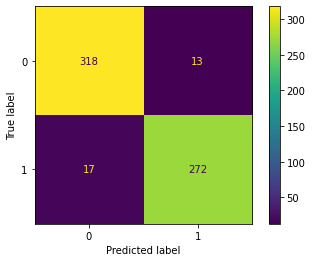

In [40]:
# build the confusion matrix
cm = metrics.confusion_matrix(y, y_pred)
# display it nicely
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

7. Perform a linear regression using the training set from Q5 with all numerical variables to predict Price and use either Lasso or Ridge regression. Report the R2 on the validation set.

In [41]:
# take random 10% of the housing for testing

train, val = train_test_split(df_housing, test_size=0.1, random_state=2020)
train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_per_room,above_median
3446,Keilor East,27 Judith St,3,h,772000.0,S,Nelson,7/05/2016,12.8,3033.0,...,672.0,132.0,1980.0,Moonee Valley,-37.74650,144.87600,Western Metropolitan,5629.0,257333.333333,0
1882,Clifton Hill,13 Caroline St,3,h,1060000.0,S,Nelson,7/11/2016,3.4,3068.0,...,193.0,98.0,1900.0,Yarra,-37.78990,144.99840,Northern Metropolitan,2954.0,353333.333333,1
3998,Melbourne,32/2 Exhibition St,1,u,700000.0,VB,Castran,19/11/2016,2.8,3000.0,...,0.0,64.0,1920.0,Melbourne,-37.81570,144.97270,Northern Metropolitan,17496.0,700000.000000,0
11579,Aspendale,14 Ebb St,3,h,970000.0,VB,hockingstuart,22/07/2017,21.5,3195.0,...,612.0,154.0,1960.0,Kingston,-38.01596,145.09932,South-Eastern Metropolitan,2824.0,323333.333333,1
9400,Altona North,242 Mason St,3,h,870000.0,S,hockingstuart,17/06/2017,9.4,3025.0,...,559.0,560.0,1950.0,Hobsons Bay,-37.83990,144.86228,Western Metropolitan,5132.0,290000.000000,0


In [45]:
# normalize the numerical columns
for col in ['Rooms', 'Distance', 'Postcode',  'Bedroom2', 
            'Bathroom', 'Car', 'Landsize', 'BuildingArea', 
            'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']:
    
    train_mean = train[col].mean()
    train_std = train[col].std()
    
    train[col] = ((train[col] - train_mean) / train_std)
    val[col] = ((val[col] - train_mean) / train_std)

train.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_per_room,above_median
3446,Keilor East,27 Judith St,0.067116,h,772000.0,S,Nelson,7/05/2016,0.549609,-0.809242,...,0.237579,-0.107290,0.421504,Moonee Valley,0.812019,-1.153866,Western Metropolitan,-0.418924,257333.333333,0
1882,Clifton Hill,13 Caroline St,0.067116,h,1060000.0,S,Nelson,7/11/2016,-1.132153,-0.398118,...,-0.311536,-0.481395,-1.670681,Yarra,0.237697,0.081210,Northern Metropolitan,-1.039764,353333.333333,1
3998,Melbourne,32/2 Exhibition St,-1.983513,u,700000.0,VB,Castran,19/11/2016,-1.239500,-1.196874,...,-0.532787,-0.855500,-1.147635,Melbourne,-0.103720,-0.178115,Northern Metropolitan,2.335284,700000.000000,0
11579,Aspendale,14 Ebb St,0.067116,h,970000.0,VB,hockingstuart,22/07/2017,2.106133,1.093676,...,0.168797,0.134778,-0.101542,Kingston,-2.753807,1.099542,South-Eastern Metropolitan,-1.069935,323333.333333,1
9400,Altona North,242 Mason St,0.067116,h,870000.0,S,hockingstuart,17/06/2017,-0.058688,-0.903214,...,0.108039,4.602034,-0.363065,Hobsons Bay,-0.423964,-1.292307,Western Metropolitan,-0.534272,290000.000000,0


In [46]:
# sklearn has a nice ridge regression model
from sklearn.linear_model import Ridge

x_train = train[['Rooms', 'Distance', 'Postcode',  'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']]
y_train = train['Price']

model = Ridge(alpha=10.0)
model.fit(x_train,y_train)

y_pred = model.predict(x_train)

# score the model
r2 = model.score(x_train, y_train)
print(f'This model has an R^2 on the train set of {r2}')

This model has an R^2 on the train set of 0.6046918932921759


In [48]:
x_val = val[['Rooms', 'Distance', 'Postcode',  'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']]
y_val = val['Price']

r2 = model.score(x_val, y_val)
print(f'This model has an R^2 on the validation set of {r2}')

This model has an R^2 on the validation set of 0.5661373437002466
